# Hernquist fit of DM halos

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Estimate-scale-lengths" data-toc-modified-id="Estimate-scale-lengths-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Estimate scale lengths</a></span></li></ul></div>

In [1]:
# scientific package imports
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from matplotlib import rcParams

import astropy.units as u
from astropy.constants import G

# import my own classes
from galaxy.galaxy import Galaxy
from galaxy.galaxies import Galaxies
from galaxy.massprofile import MassProfile
from galaxy.timecourse import TimeCourse
from galaxy.centerofmass import CenterOfMass
from galaxy.plots import Plots

In [2]:
tc = TimeCourse(usesql=True)

## Estimate scale lengths

In [3]:
def get_a(galname, snap, r_outer=100):
    gal = Galaxy(galname, snap, usesql=True)
    t = gal.time.value / 1000
    com_p, _ = tc.get_one_com(galname, snap)
    mp = MassProfile(gal, com_p)
    fitted_a, perr = mp.fit_hernquist_a(r_outer=r_outer, get_details=True)
    return t, fitted_a.value, perr.value

In [4]:
# with open('./hqa.txt', 'w') as f:
#     f.write(f"# {'gal':>5s}{'snap':>8s}{'t':>8s}{'a':>8s}{'err':>8s}\n")
# for galname in ('MW','M31','M33'):
#     print(galname)
#     for snap in np.arange(0, 802):
#         try:
#             t, a, err = get_a(galname, snap)
#             with open('./hqa.txt', 'a') as f:
#                 f.write(f"{galname:>7s}{snap:8d}{t:8.3f}{a:8.1f}{err:8.1f}\n")   
#         except ValueError:
#             print(galname, snap)

In [21]:
hqa = np.genfromtxt('hqa.txt', names=True, skip_header=0,
                    dtype=[('gal', 'U3'), ('snap', '<i8'), ('t', '<f8'), ('a', '<f8'), ('err', '<f8')])

In [22]:
hqa

array([('MW',   0,  0.   ,  61.6, 0.5), ('MW',   1,  0.014,  61. , 0.1),
       ('MW',   2,  0.029,  60.1, 0.4), ...,
       ('M33', 799, 11.414, 114.6, 9.6), ('M33', 800, 11.429, 114.5, 9.8),
       ('M33', 801, 11.443, 112.7, 9.8)],
      dtype=[('gal', '<U3'), ('snap', '<i8'), ('t', '<f8'), ('a', '<f8'), ('err', '<f8')])

In [23]:
MW = hqa[hqa['gal'] == 'MW']
M31 = hqa[hqa['gal'] == 'M31']
M33 = hqa[hqa['gal'] == 'M33']


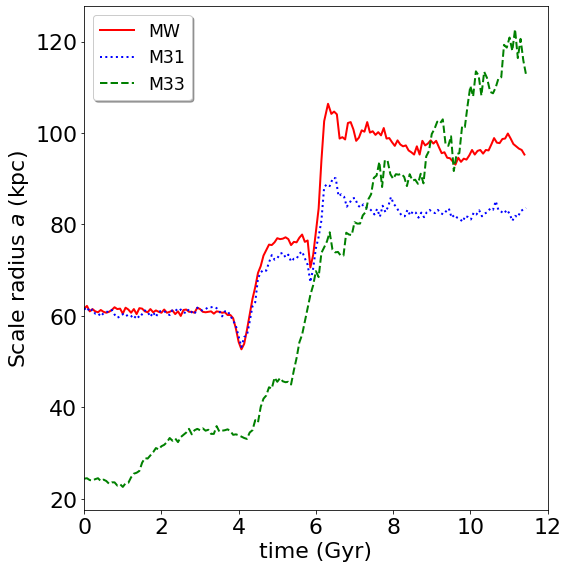

In [32]:
fig = plt.figure(figsize=(8,8))
ax0 = plt.subplot()

# add the curves
n = 5 # plot every n'th time point
ax0.plot(MW['t'][::n], MW['a'][::n], 'r-', lw=2, label='MW')
ax0.plot(M31['t'][::n], M31['a'][::n], 'b:', lw=2, label='M31')
ax0.plot(M33['t'][::n], M33['a'][::n], 'g--', lw=2, label='M33')

ax0.legend(fontsize='xx-large', shadow=True)

# Add axis labels
ax0.set_xlabel("time (Gyr)", fontsize=22)
ax0.set_ylabel("Scale radius $a$ (kpc)", fontsize=22)

ax0.set_xlim(0,12)

# ax0.set_title("Hernquist scale radius", fontsize=24)
#adjust tick label font size
label_size = 22
rcParams['xtick.labelsize'] = label_size 
rcParams['ytick.labelsize'] = label_size

plt.tight_layout()
plt.savefig('hernquist_a.pdf', rasterized=True, dpi=350);